# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

In [ ]:
import pandas as pd
!pip install xlrd==1.2.0 

import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


데이터 살펴보기

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/인공지능 파이썬/[파이썬 Basic Toy 프로젝트]/BostonHousing.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

## 데이터 타입과 결측값 확인하기

In [ ]:
df.info() #데이터 타입 중 문자열 타입이 없으므로 바로 입력해서 계산해도 됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [ ]:
df.isna().sum() # 결측된 값 없음!

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [ ]:
df.corr() # 요인들 간의 상관관계 비교

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


In [ ]:
# 주택가격(MEDV)와 관련 높은 요인은?
df_corr = df.corr()
corr_order = df.corr().loc[:'LSTAT','MEDV'].abs().sort_values(ascending=False) #CAT.MEDV는 MEDV값이 30,000을 넘는지 판단하는 값이므로 제외 [:'LSTAT']
                                                                               #1과 가까울수록 상관관계 높으므로 abs()함수로 모두 양수로 변환후 내림차순으로 정렬
corr_order

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [ ]:
# 주택가격과 가장 상관관계가 높은 상위 3항목
# 1. 하위 계층 비율 (LSTAT)     // 가설: 하위 계층 비율이 높을수록 소득 및 재산이 적기 때문에 주택가격은 낮을 것이다. 
# 2. 방의 수 (RM)             // 가설: 일반적으로 방의 수가 많을수록 평수가 넓기 때문에 주택가격이 높을 것이다.
# 3. 학생-교사비율 (PTRATIO)    // 가설: 학생-교사비율이 높다는 것은 도시화가 많이 됐다는 것을 의미하므로 PTRATIO값이 높을 수록 주택가격도 높을 것이다. 

## 데이터 분포 확인하기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

os = platform.system()
if os == "Darwin":    
    plt.rc('font', family="AppleGothic")
elif os == "Linux":
    plt.rc('font', family='NanumBarunGothic')
else:    
    plt.rc('font', family="Malgun Gothic")
    plt.rcParams['axes.unicode_minus'] = False

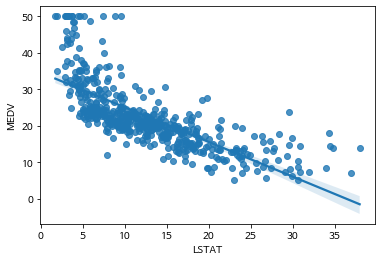

In [ ]:
#먼저 주택가격과 가장 상관관계가 높았던 3요인들과 비교!

# 1.하위 계층 비율 (LSTAT) 
df.columns
df1 = df[['MEDV','LSTAT']] #불필요한 columns 제거

import seaborn as sns

sns.regplot(x= 'LSTAT', y= 'MEDV', data= df1);

In [ ]:
#분석 결과 하위 계층 비율(LSTAT)이 높을수록 주택가격(MEDV)이 낮은 경향을 보이는, 서로 반비례 관계임을 알 수 있다.
#이를 통해 위에서 내린 "가설: 하위 계층 비율이 높을수록 소득 및 재산이 적기 때문에 주택가격은 낮을 것이다."이 맞았음을 확인할 수 있다.

In [ ]:
# 2. 방의 수 (RM)
df2 = df[['MEDV','RM']] #방의 수와 집값만 가져옴

df2['RM'].describe() # 방 갯수의 요약정보확인


count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [ ]:
#방의 갯수에 따라 대략적으로 분류  >> 분포도를 보니 5개 미만/ 5개 / 6개 / 7개 이상 으로 나누면 적당해보임
def RM(x):
  if x < 5:
    return "5개 미만"
  elif x <6:
    return "5개"
  elif x <7:
    return "6개"
  else:
    return "7개 이상"

df2['방의 수'] = df2['RM'].map(RM)
print(df2.head())


how = {
    'MEDV':np.mean
}

df2.groupby('방의 수').agg(how)


   MEDV     RM   방의 수
0  24.0  6.575     6개
1  21.6  6.421     6개
2  34.7  7.185  7개 이상
3  33.4  6.998     6개
4  36.2  7.147  7개 이상


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,MEDV
방의 수,
5개,17.487342
5개 미만,17.260000
6개,22.015985
7개 이상,38.396875


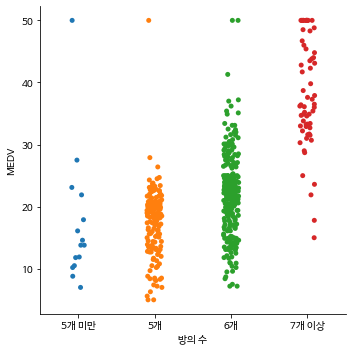

In [ ]:
sns.catplot(x='방의 수',y='MEDV',data=df2,order=['5개 미만','5개','6개','7개 이상']) #위의 결과값을 보기좋게 시각화!

In [ ]:
# 위의 시각화한 결과를 보면 몇몇 수치를 제외하고는 대체로 방이 많은 집일수록 주택가격이 높음을 알 수 있다.
# 따라서, "가설: 일반적으로 방의 수가 많을수록 평수가 넓기 때문에 주택가격이 높을 것이다."은 맞다고 볼 수 있다.

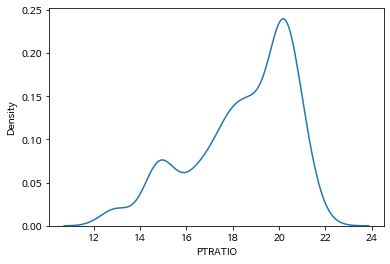

In [ ]:
#3. 학생-교사비율 (PTRATIO)
df3 = df[['MEDV','PTRATIO']]

sns.kdeplot(x='PTRATIO', data=df3) # 분포도를 보니 16미만/ 16이상 18미만 / 18이상 20미만 / 20이상 으로 분류하면 좋을듯하다.

In [ ]:
def PTRATIO(x3): #위에서 정한 기준대로 분류
  if x3 < 16:
    return "16미만"
  elif x3 <18:
    return "16이상 18미만"
  elif x3 <20:
    return "18이상 20미만"
  else:
    return "20이상"

df3['학생-교사비율'] = df3['PTRATIO'].map(PTRATIO)
print(df3.head())

how = {
    'MEDV':np.mean
}

df3.groupby('학생-교사비율').agg(how)

   MEDV  PTRATIO    학생-교사비율
0  24.0     15.3       16미만
1  21.6     17.8  16이상 18미만
2  34.7     17.8  16이상 18미만
3  33.4     18.7  18이상 20미만
4  36.2     18.7  18이상 20미만


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,MEDV
학생-교사비율,
16미만,29.648750
16이상 18미만,26.529524
18이상 20미만,23.663333
20이상,16.937811


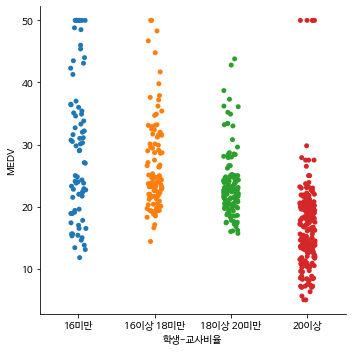

In [ ]:
sns.catplot(x='학생-교사비율',y='MEDV',data=df3) #위의 결과값을 보기좋게 시각화!

In [ ]:
#위의 시각화 자료를 보면 학생-교사비율이 높을수록 집값이 대체로 낮은것을 확인할 수 있다.
#하지만 위에서 내린 "가설: 학생-교사비율이 높다는 것은 도시화가 많이 됐다는 것을 의미하므로 PTRATIO값이 높을 수록 주택가격도 높을 것이다."
#을 완벽하게 맞다고 확신하기에는 16미만의 값들이 너무 광범위하게 분포한다.
#따라서, 학생-교사비율은 집값과는 어느정도 상관관계를 갖지만 직접적인 상관관계라기 보다는 다른 요인과의 복합적인 이유로 유사성을 갖는 요인이라 볼 수 있다.

주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요
- 대형 평수 vs 소형 평수
- 노후화 정도와 집값의 관계는?
- 직주근접?
- 찰스강뷰?
- 직장이 가까우면서 소형 평수인 부동산의 가격은?

In [ ]:
# 제시된 문제
# 대형 평수 vs 소형 평수   >> 'ZN'값과 집값과의 상관관계를 통해 알 수 있다.
# 노후화 정도와 집값의 관계는?  >> 'AGE'데이터 값을 통해 건물의 노후화 정도에 따른 집값의 관계를 구할 수 있다.
# 직주근접?   >> 'INDUS'데이터 값을 통해 산업지역과 주택 사이의 거리에 따른 가격차이를 구할 수 있다.
# 찰스강뷰?   >> 'CHAS'데이터 값을 찰스강이 집에서 가까운지 여부가 집값에 영향을 끼치는지 알 수 있다.
# 직장이 가까우면서 소형 평수인 부동산의 가격은? >> 높은 'INDUS'값과 낮은 'ZN'값을 만족하는 지역의 주택가격을 평균을 내보면 알 수 있다.

In [ ]:
#대형 평수 vs 소형 평수
df4 = df[['MEDV','ZN']]
df4.head()

,MEDV,ZN
0,24.0,18.0
1,21.6,0.0
2,34.7,0.0
3,33.4,0.0
4,36.2,0.0


In [ ]:
# 25,000평방피트를 초과하는 그룹을 '대형 평수', 넘지 못하는 그룹을 '소형 평수'로 분류하겠다.
def func4(x4):
  if x4 == 0:
    return "소형 평수"
  else:
    return "대형 평수"

df4['평수 크기'] = df4['ZN'].map(func4)
print(df4.head())

how = {
    'MEDV':np.mean
}

df4.groupby('평수 크기').agg(how)

   MEDV    ZN  평수 크기
0  24.0  18.0  대형 평수
1  21.6   0.0  소형 평수
2  34.7   0.0  소형 평수
3  33.4   0.0  소형 평수
4  36.2   0.0  소형 평수


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MEDV
평수 크기,
대형 평수,28.250000
소형 평수,20.473387


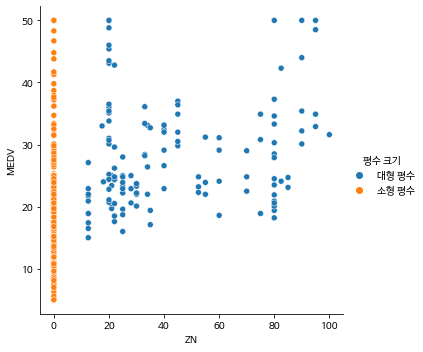

In [ ]:
sns.relplot(x="ZN", y="MEDV", hue="평수 크기", data=df4); #평수 크기에 따른 집값의 분포도

In [ ]:
# 25,000 평방피트 이하의 집들의 데이터는 모두 0처리 되어 정확한 분포는 파악하기 어렵지만, 위의 표에 나타난 점들의 밀집도를 고려해서 판단해보면
#소형 평수의 집 가격은 평균적으로 20,000$로, 대형 평수만큼 비싼 집도 있지만 대부분의 주택은 25,000$ 아래에 집중적으로 몰려있는 것을 볼 수 있다.
#대형 평수의 집 가격은 최저가격이 15,000$정도로, 소형 평수의 집들 보다 높은 가격을 보인다. 실제로도 두 그룹의 평균 가격 차이는 8,000$차이가 난다.
#이를 통해 집의 평수가 주택의 가격을 어느정도인지 판단할 수 있는 요인이라는 결론에 도달할 수 있다. 

In [ ]:
# 노후화 정도와 집값의 관계는?
df5 = df[['MEDV','AGE']]
df5.head()

,MEDV,AGE
0,24.0,65.2
1,21.6,78.9
2,34.7,61.1
3,33.4,45.8
4,36.2,54.2


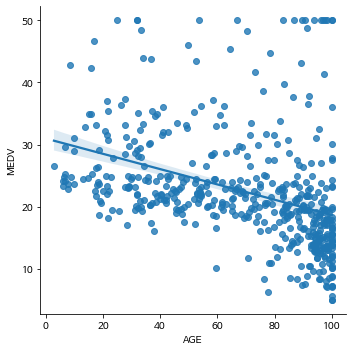

In [ ]:
sns.lmplot(x="AGE", y="MEDV", data=df5); # 노후화 정도에 따른 집값의 분포 ('AGE'값이 높을수록 1940년 이전에 건축된 건물 )

In [ ]:
#위의 산포도를 보면 대체로 노후화된(AGE증가) 건물일수록 가격이 감소하는 우하향의 그래프를 볼 수 있다.
#집 관리를 열심히해도 오래된 건물은 최근에 지어진 건물보다는 노후화 되기 쉽다. 따라서 새로운 집과의 경쟁에서 떨어져 집값이 떨어짐을 볼 수 있다.

In [ ]:
# 직주근접?
df6 = df[['MEDV','INDUS']]
df6.head()

,MEDV,INDUS
0,24.0,2.31
1,21.6,7.07
2,34.7,7.07
3,33.4,2.18
4,36.2,2.18


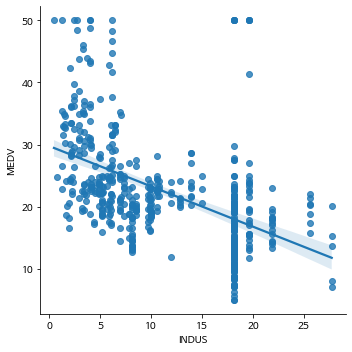

In [ ]:
sns.lmplot(x="INDUS", y="MEDV", data=df6); #데이터의 범위가 넓으니 산포도로 분석해본다.

In [ ]:
# 비소매상업지역 면적 비율이 적을수록(INDUS값이 0에 가까울수록) 집값은 상승하였다. 상업지역이 가까울수록 출퇴근이 편해 집값이 높을 것이라 예상했지만, 정반대의 결과가 나타났다.
# 우리나라와는 달리 미국은 도심보다는 교외의 주택을 더 선호하기에 상업지역에서 멀어지는 곳의 주택가격이 상승하는 모습을 보인다.
# 직주근접 정도 역시 주택가격에 영향을 끼치는 요인으로 볼 수 있다.

In [ ]:
# 찰스강뷰? 
df7 = df[['MEDV','CHAS']]
df7.head()

,MEDV,CHAS
0,24.0,0
1,21.6,0
2,34.7,0
3,33.4,0
4,36.2,0


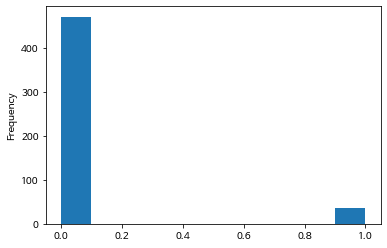

In [ ]:
df['CHAS'].plot.hist() #찰스강에 인접한 그룹과 먼 그룹의 집값 평균을 비교하면 좋을것같다.

In [ ]:
def func7(x7): #두 그룹의 집값 평균치를 구해본다.
  if x7 == 0:
    return "X"
  else:
    return "O"

df7['찰스강 뷰'] = df7['CHAS'].map(func7)
print(df7.head())

how = {
    'MEDV':np.mean
}

df7.groupby('찰스강 뷰').agg(how)

   MEDV  CHAS 찰스강 뷰
0  24.0     0     X
1  21.6     0     X
2  34.7     0     X
3  33.4     0     X
4  36.2     0     X


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,MEDV
찰스강 뷰,
O,28.440000
X,22.093843


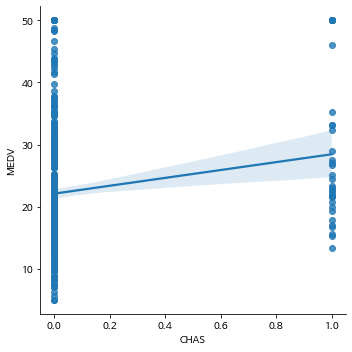

In [ ]:
sns.lmplot(x="CHAS", y="MEDV", data=df7); # 두 그룹의 평균 집값을 비교해본결과 찰스강이 보이는 주택의 평균가격이 6,000$정도 높음을 확인할 수 있다. 

In [ ]:
#찰스강 뷰가 집값에 영향을 끼치는 정도는 극명한 차이는 아니지만 어느정도 영향을 준다는 사실을 알 수 있다. 
#지금까지 집값에 영향을 준 요인들에 비하면 미미한 영향력이지만 단순히 평균 값으로만 판단했을 때, 찰스강이 보이는 편이 집값 상승에 조금 더 유리해 보인다.

In [ ]:
# 직장이 가까우면서 소형 평수인 부동산의 가격은?
df8 = df[['MEDV','INDUS','ZN']]
df8.head()

,MEDV,INDUS,ZN
0,24.0,2.31,18.0
1,21.6,7.07,0.0
2,34.7,7.07,0.0
3,33.4,2.18,0.0
4,36.2,2.18,0.0


In [ ]:
#소형 평수는 df4에서 만든 '소형 평수'시리즈를 가져오면 되는데, 직장에서 가까운지를 판단하는 데이터는 이번에 구해야한다.
df8['소형 평수'] = df4['ZN'].map(func4)
df8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MEDV,INDUS,ZN,소형 평수
0,24.0,2.31,18.0,대형 평수
1,21.6,7.07,0.0,소형 평수
2,34.7,7.07,0.0,소형 평수
3,33.4,2.18,0.0,소형 평수
4,36.2,2.18,0.0,소형 평수
...,...,...,...,...
501,22.4,11.93,0.0,소형 평수
502,20.6,11.93,0.0,소형 평수
503,23.9,11.93,0.0,소형 평수
504,22.0,11.93,0.0,소형 평수


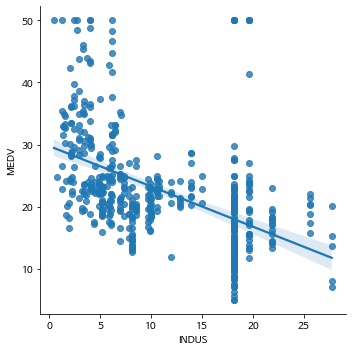

In [ ]:
sns.lmplot(x="INDUS", y="MEDV", data=df6) #df6의 값을 보니 INDUS 수치가 16이상인 값을 직장에 가까운 주택으로 설정하면 좋을 것 같다.

In [ ]:
def func8(x8): #두 그룹의 집값 평균치를 구해본다.
  if x8 >=16:
    return "집-직장 가까움"

df8['집-직장 가까움'] = df8['INDUS'].map(func8)
df8.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,MEDV,INDUS,ZN,소형 평수,집-직장 가까움
0,24.0,2.31,18.0,대형 평수,None
1,21.6,7.07,0.0,소형 평수,None
2,34.7,7.07,0.0,소형 평수,None
3,33.4,2.18,0.0,소형 평수,None
4,36.2,2.18,0.0,소형 평수,None


In [ ]:
#집에서 직장이 가까우면서 소형평수를 갖는 값의 집값 평균을 구하면?

df8.groupby(['집-직장 가까움','소형 평수']).agg(how) #.agg(how)는 변수의 집값평균을 구하는 함수

,,MEDV
집-직장 가까움,소형 평수,
집-직장 가까움,소형 평수,17.625397


In [ ]:
#위의 과정들을 통해 직장과 가까우면서 평수는 작은 집의 평균 가격이 17,625$ 정도라는 것을 알 수 있다.

<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>